In [1]:
import pandas as pd
import numpy as ny
import statsmodels.api as sm
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as sa
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

# Data

In [2]:
water = pd.read_csv('water_potability.csv')
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
x = water[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y = water['Potability']

In [5]:
water['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

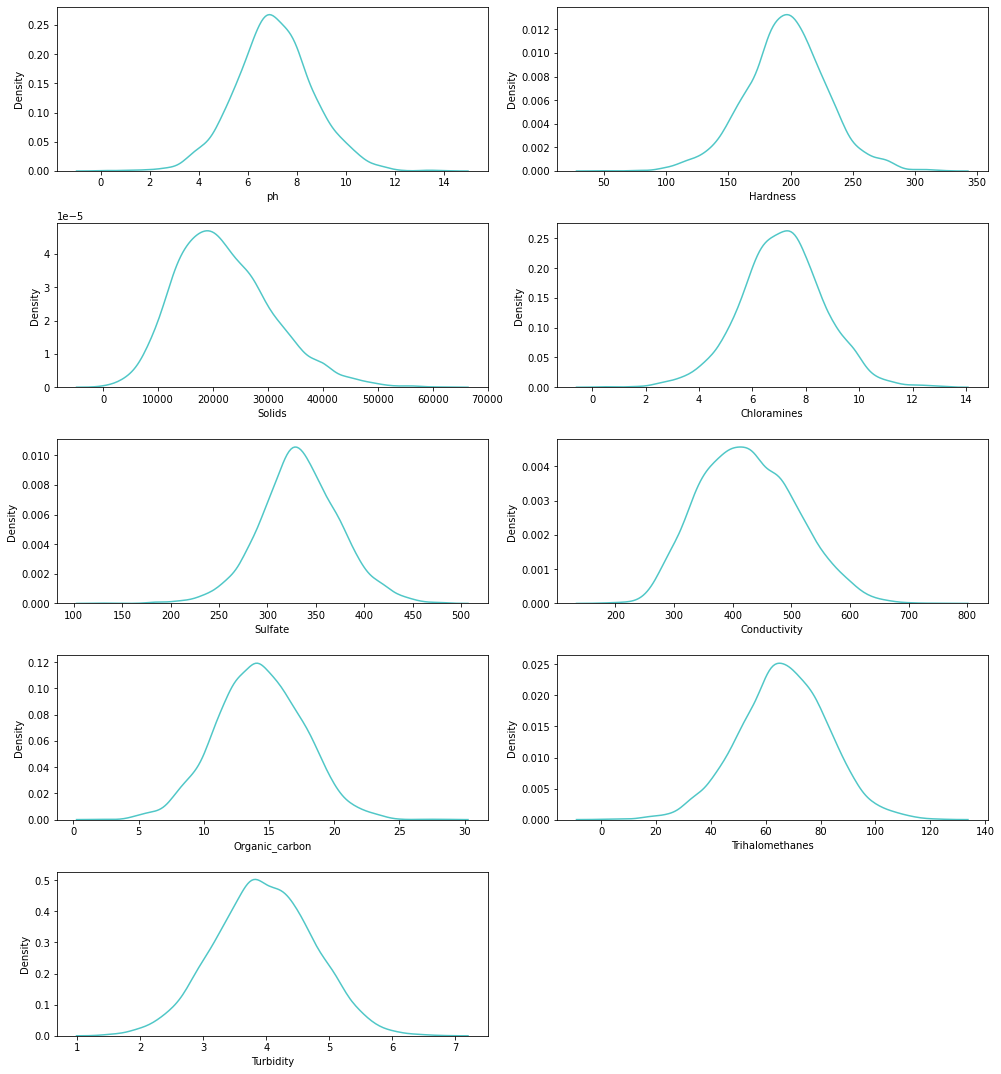

In [6]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(14,15))
# for index,col in enumerate(water.drop('Potability',axis=1).columns):
#     plt.subplot(5,2,index+1)
#     sbn.distplot(water.drop('Potability', axis=1).loc[:,col].dropna(), kde=False, color ='#50C7C7')
# fig.tight_layout(pad=1.0)

for index,col in enumerate(x.columns):
    plt.subplot(5,2,index+1)
    sbn.distplot(x.loc[:,col].dropna(), color ='#50C7C7',hist=False)
fig.tight_layout(pad=1.0)

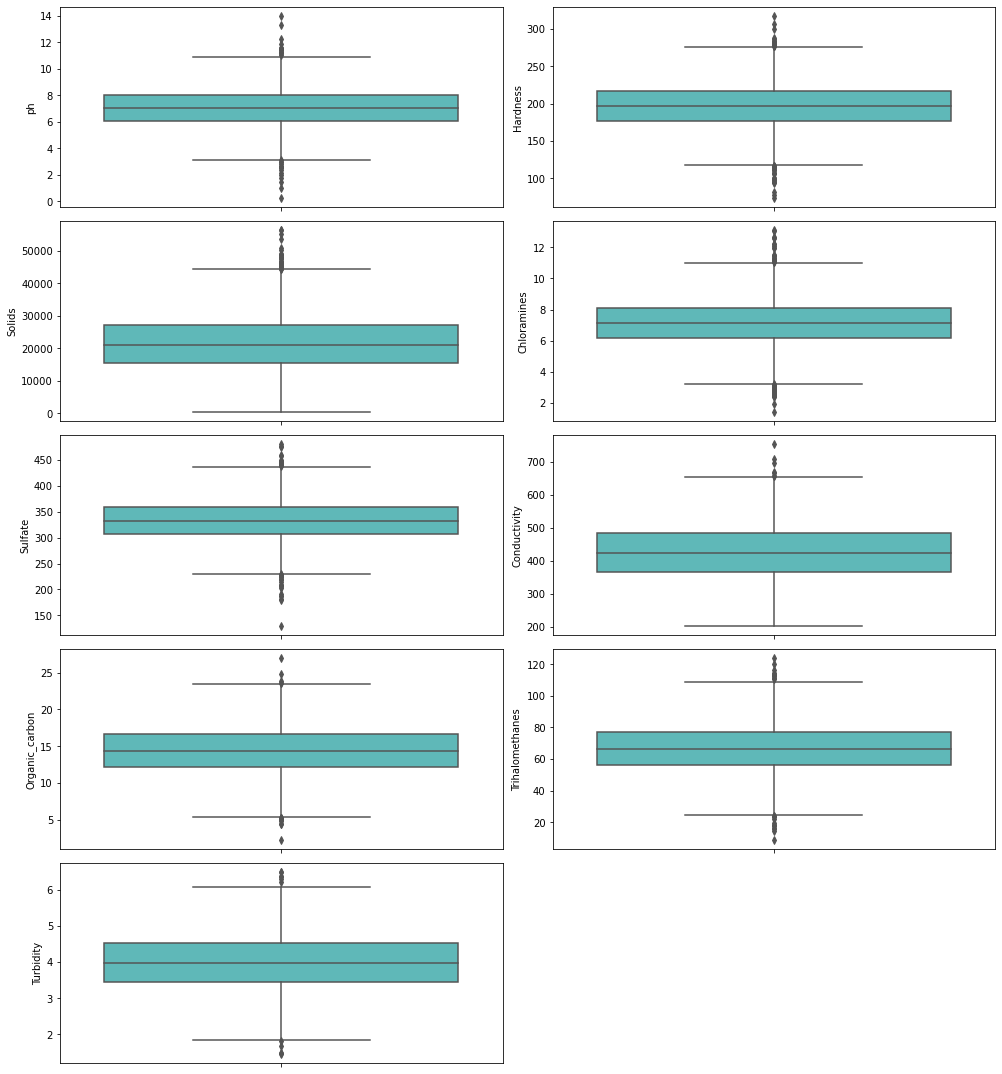

In [7]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(x.columns):
    plt.subplot(5,2,index+1)
    sbn.boxplot(y=col, data=x.dropna(), color ='#50C7C7')
fig.tight_layout(pad=1.0)

<AxesSubplot:>

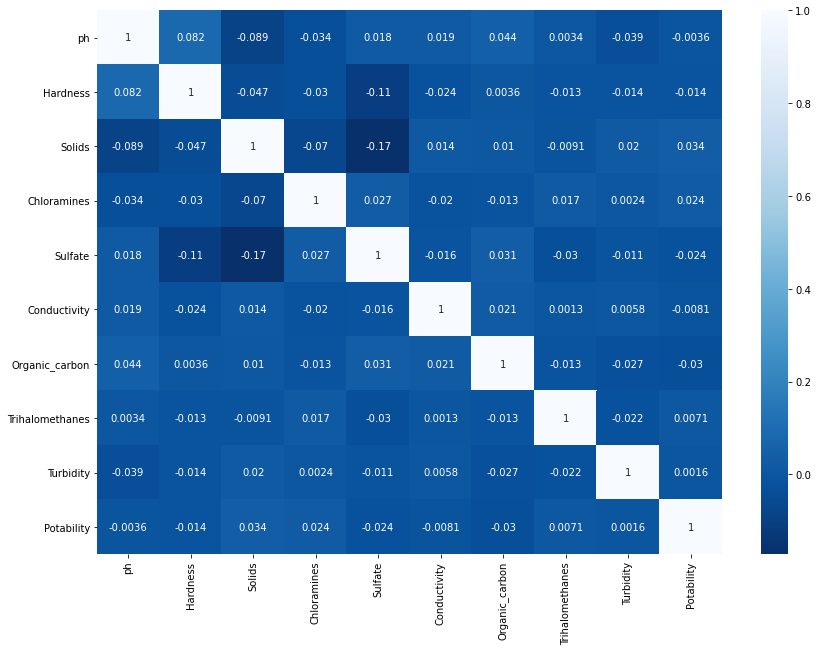

In [8]:
plt.figure(figsize=(14,10))
sbn.heatmap(water.corr(), annot = True,cmap='Blues_r')

In [9]:
simple_imputer = SimpleImputer(strategy = 'median')
water[['ph','Sulfate','Trihalomethanes']]=simple_imputer.fit_transform(water[['ph','Sulfate','Trihalomethanes']])
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [10]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Linear Regression Model Output

In [11]:
x = water[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y = water['Potability']
x = sa.add_constant(x)
model = sa.OLS(y,x) 
result = model.fit()

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Potability   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.175
Date:                Thu, 14 Oct 2021   Prob (F-statistic):              0.306
Time:                        10:44:25   Log-Likelihood:                -2291.3
No. Observations:                3276   AIC:                             4603.
Df Residuals:                    3266   BIC:                             4664.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4704      0.146     

## Normality

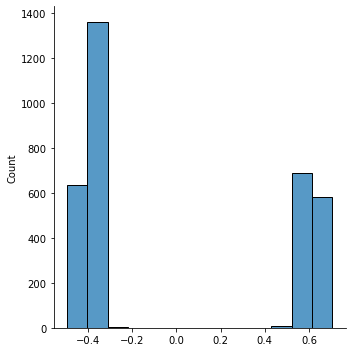

In [13]:
sbn.displot(result.resid)

## Gauss-Markov Assumption

Text(0, 0.5, 'residual')

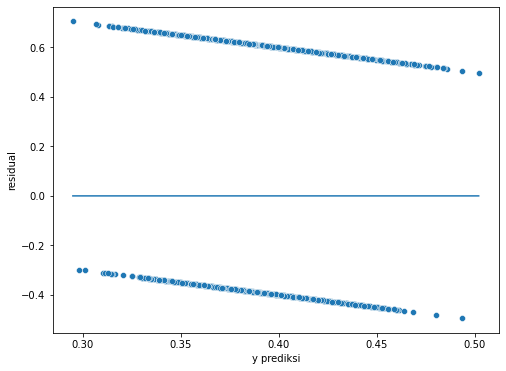

In [14]:
plt.figure(figsize=(8,6))
sbn.scatterplot(x = result.fittedvalues, y= result.resid)
sbn.lineplot(result.fittedvalues, 0)

plt.xlabel('y prediksi')
plt.ylabel('residual')

## Multicollinerity Proving

In [15]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variable'] = x.columns
    vif['Vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [16]:
calc_vif(x.drop(columns='const'))

,Variable,Vif
0,ph,22.809050
1,Hardness,30.836022
2,Solids,6.969571
3,Chloramines,19.585579
4,Sulfate,56.176186
5,Conductivity,25.978811
6,Organic_carbon,18.695406
7,Trihalomethanes,17.371757
8,Turbidity,24.128751


From the linear regression model above we can see that the condition such as normality, assumption, and multicollinerity are not properly fulfilled. In the normality diagram we can see the missing value which not shown in the graph. From the Gauss-Markov assumption scatterplot diagram are completely overlapping between top and bottom data point wich suppossed to be distributed near the center line.Lastly is the hyper multicollinerity that causing the unstable of estimator and parameter value. Thus the other model approaches is needed to handle this condition.

# Data Splitting 

In [17]:
x_trainval,x_test,y_trainval,y_test = train_test_split(
 x,
 y,
 test_size= 0.25,
 random_state = 42
)

# Hyperparameter Tuning

In [18]:
logreg = LogisticRegression(solver = 'liblinear', random_state =42)
knn = KNeighborsClassifier(n_neighbors = 5)
tree = DecisionTreeRegressor(criterion = 'mae', max_depth = 5, random_state = 42)
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
model_xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 10)

In [19]:
models = [
['Logistic Regression',LogisticRegression(solver = 'liblinear', random_state =42)],
['KNN', KNeighborsClassifier(n_neighbors = 5)],
['Decision Tree Regressor',DecisionTreeRegressor(criterion = 'mae', max_depth = 5, random_state = 42)],
['Random Forest Classifier', RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)],
['XGBoost Classifier', XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 10)]
]


def model_evaluation(model):
    model_name=[]
    precison_score=[]
    precison_score1=[]
    for name, model in models:
    
     skfold = StratifiedKFold(n_splits = 5)
     model_cv = cross_val_score(model, x_trainval, y_trainval, cv = skfold)
     precison_score.append(model_cv.mean())
     precison_score1.append(model_cv.std())
     model_name.append(name)

    return pd.DataFrame({
        'Model': model_name,
        'Cross_Validation_Mean':precison_score,
        'Cross_Validation_STD':precison_score1,
        }).sort_values('Cross_Validation_Mean',ascending=False).reset_index(drop=True)

In [20]:
model_evaluation(models)

[10:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model,Cross_Validation_Mean,Cross_Validation_STD
0,XGBoost Classifier,0.641425,0.012405
1,Random Forest Classifier,0.617417,0.006833
2,Logistic Regression,0.605617,0.000746
3,KNN,0.553510,0.016215
4,Decision Tree Regressor,-0.595005,0.063360


Random forest classifier has the better evaluation score among the other models

In [21]:
def acc_eval(model):
    model_name=[]
    precison_score=[]
    for name, model in models:

     model.fit(x_trainval, y_trainval)
     y_pred = model.predict(x_test)
     
     precison_score.append(accuracy_score(y_test,y_pred))
     model_name.append(name)

    return pd.DataFrame({
        'Model': model_name,
        'Accuracy_score':precison_score,
        }).sort_values('Accuracy_score',ascending=False).reset_index(drop=True)

df = pd.DataFrame(acc_eval(models))
df

[10:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy_score
0,XGBoost Classifier,0.680098
1,Random Forest Classifier,0.637363
2,Decision Tree Regressor,0.636142
3,Logistic Regression,0.622711
4,KNN,0.543346


[10:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


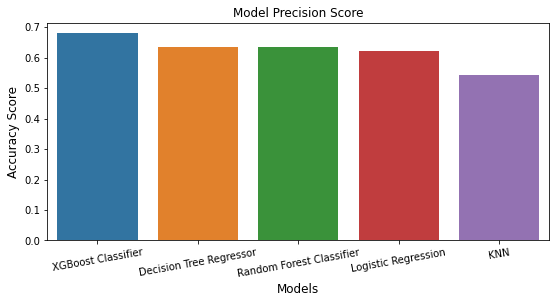

In [22]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=10)
sbn.barplot(data = acc_eval(models), x = 'Model', y = 'Accuracy_score')
plt.title('Model Precision Score')
plt.xlabel('Models' , size = 12); plt.ylabel('Accuracy Score', size = 12)
plt.show()

In [23]:
df['Accuracy_score'].mean()*100

62.393162393162385

In the output score above show the average accuracy score is between 62.4%.But among the three model above random forest classifier has the highest score, so after this we will try to measure the performance of tree model in test due to the highest score.

# Modelling performance in test

In [24]:
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
rf.fit(x_trainval, y_trainval)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=300)

In [25]:
y_pred = rf.predict(x_test)

In [26]:
f1_score,recall_score,precision_score

(<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

In [27]:
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.08562691131498472
0.045307443365695796
0.7777777777777778


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       510
           1       0.78      0.05      0.09       309

    accuracy                           0.63       819
   macro avg       0.70      0.52      0.43       819
weighted avg       0.69      0.63      0.51       819



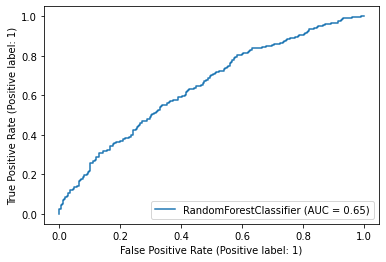

In [29]:
plot_roc_curve(rf, x_test, y_test)

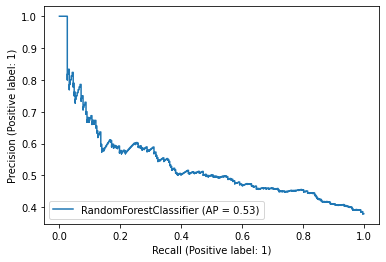

In [30]:
plot_precision_recall_curve(rf, x_test, y_test)

In [31]:
x.shape[0]*0.2

655.2

# Data Splitting 2

In [32]:
x_train,x_val,y_train,y_val = train_test_split(
    x_trainval,
    y_trainval,
    stratify = y_trainval, #agar menjaga proporsi default pada train dan test sama
    test_size = 655, 
    random_state =42
)

## Hyperparameter tuning choose

In [33]:
hyper_param = {
    'n_estimators' : [100,200,300,400], #makin kecil angka makin overfitting dan sebaliknya maka underfitting #panjang 4
    'max_features' : [2,4],
    'max_depth' : [2,3,4,5], #panjang 2
}
#berarti mencoba 72 kombinasi
#pilih 20 dari 72
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
random = RandomizedSearchCV(
    rf,
    param_distributions = hyper_param,
    n_iter = 20,
    cv = 5,
    scoring = 'r2',
    random_state = 42,
    n_jobs = -1
)

In [34]:
random.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=3, max_features=2,
                                                    n_estimators=300),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'max_features': [2, 4],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='r2')

In [35]:
random.best_score_

-0.4960961500842229

In [36]:
random.best_params_

{'n_estimators': 300, 'max_features': 4, 'max_depth': 5}

In [37]:
hasilcv=pd.DataFrame(random.cv_results_)
hasilcv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.506932,0.009726,0.023229,0.001472,200,4,5,"{'n_estimators': 200, 'max_features': 4, 'max_...",-0.381407,-0.528582,-0.569970,-0.523453,-0.488564,-0.498395,0.063945,2
1,0.791187,0.012278,0.040450,0.001321,400,4,3,"{'n_estimators': 400, 'max_features': 4, 'max_...",-0.532317,-0.586482,-0.593229,-0.628117,-0.546711,-0.577371,0.034292,8
2,0.182527,0.003520,0.012215,0.000400,100,2,5,"{'n_estimators': 100, 'max_features': 2, 'max_...",-0.567143,-0.540162,-0.628117,-0.569970,-0.535082,-0.568095,0.033098,6
3,0.355844,0.008913,0.023730,0.002382,200,2,4,"{'n_estimators': 200, 'max_features': 2, 'max_...",-0.601968,-0.563322,-0.558341,-0.628117,-0.593229,-0.588995,0.025751,11
4,0.170613,0.012277,0.012315,0.002161,100,2,3,"{'n_estimators': 100, 'max_features': 2, 'max_...",-0.625185,-0.563322,-0.581600,-0.628117,-0.639747,-0.607594,0.029665,12
5,0.307183,0.005360,0.020526,0.000776,200,2,3,"{'n_estimators': 200, 'max_features': 2, 'max_...",-0.636793,-0.667543,-0.616488,-0.628117,-0.616488,-0.633086,0.018851,16
6,0.736218,0.029450,0.033041,0.001380,300,4,5,"{'n_estimators': 300, 'max_features': 4, 'max_...",-0.416233,-0.482261,-0.523453,-0.581600,-0.476935,-0.496096,0.054765,1
7,0.388084,0.008575,0.024030,0.002305,200,2,5,"{'n_estimators': 200, 'max_features': 2, 'max_...",-0.543926,-0.574902,-0.604859,-0.569970,-0.535082,-0.565748,0.024690,5
8,0.204355,0.008522,0.012916,0.001282,100,4,3,"{'n_estimators': 100, 'max_features': 4, 'max_...",-0.543926,-0.586482,-0.581600,-0.593229,-0.581600,-0.577367,0.017256,7
9,0.177421,0.016792,0.012115,0.001465,100,2,2,"{'n_estimators': 100, 'max_features': 2, 'max_...",-0.636793,-0.655963,-0.651376,-0.651376,-0.663006,-0.651703,0.008584,20


In [38]:
hasilcv[hasilcv['param_n_estimators']==300][hasilcv['param_max_features']==4][hasilcv['param_max_depth']==5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.736218,0.02945,0.033041,0.00138,300,4,5,"{'n_estimators': 300, 'max_features': 4, 'max_...",-0.416233,-0.482261,-0.523453,-0.5816,-0.476935,-0.496096,0.054765,1


# Model Before And After

In [39]:
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
rf2 = RandomForestClassifier(n_estimators = 300, max_features = 4, max_depth = 5)

In [40]:
def final_eval(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Mean squared error score =',mean_squared_error(y_test,y_pred))
    print('R2 score =',r2_score(y_test,y_pred))
    print('Precision score =',precision_score(y_test,y_pred))

In [41]:
final_eval(rf)

Mean squared error score = 0.3626373626373626
R2 score = -0.5435179897201601
Precision score = 0.875


In [42]:
final_eval(rf2)

Mean squared error score = 0.3308913308913309
R2 score = -0.40839520274129093
Precision score = 0.7714285714285715


As the score shown above, both error metrics score are having the decreation value which signify that the model are quite effectively boosting up model performance since the more error rate are decreased, the more accurete it's model. Plus in this case the observation of false positive class are required due to the danger outcomes that possibly impact the consumer of unsanitary water. Hence precision score is used to calculate how big is the false positive class is. It's also show the decreation of precision score which means model are able to cut off some of the false positive class even it's not quite significant.   

## Feature Importances

In [43]:
df_feature = pd.DataFrame({
    'importance':rf2.feature_importances_},
    index = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes',
    'Turbidity','Potability']
).sort_values('importance', ascending =False) #[:14].plot(kind ='barh')
df_feature

,importance
Conductivity,0.235098
Hardness,0.183161
Sulfate,0.127326
Solids,0.124560
Chloramines,0.104767
Organic_carbon,0.061232
Potability,0.057346
Turbidity,0.056777
Trihalomethanes,0.049733
ph,0.000000


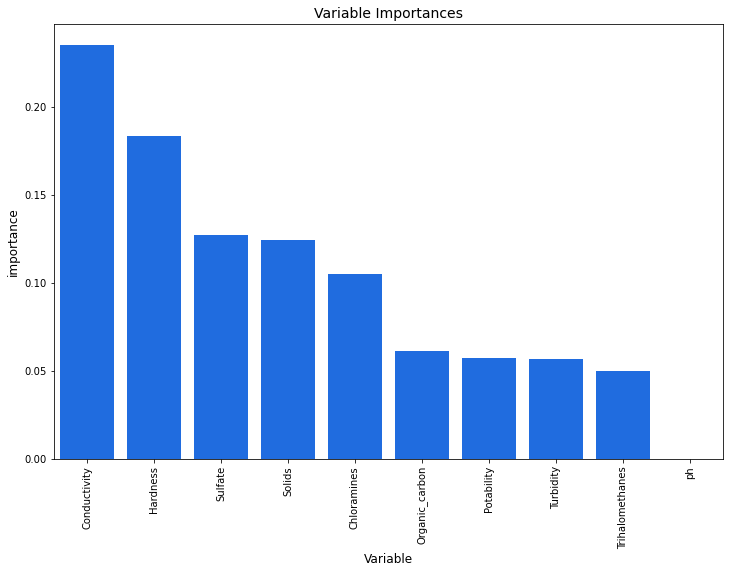

In [44]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.ylabel('Importance',size = 12); plt.xlabel('Variable',size = 12); plt.title('Variable Importances',size = 14);
sbn.barplot(data = df_feature,x = df_feature.index, y = df_feature['importance'], color='#0066ff' )
sbn.color_palette("Blues", as_cmap=True)